<a href="https://colab.research.google.com/github/01Kanishk10/Google-Colab-22BDS0232/blob/main/22BDS0232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Males.csv"
df = pd.read_csv(url)

# View first rows
print(df.head())

   rownames  nr  year  school  exper union   ethn maried health      wage  \
0         1  13  1980      14      1    no  other     no     no  1.197540   
1         2  13  1981      14      2   yes  other     no     no  1.853060   
2         3  13  1982      14      3    no  other     no     no  1.344462   
3         4  13  1983      14      4    no  other     no     no  1.433213   
4         5  13  1984      14      5    no  other     no     no  1.568125   

                      industry                      occupation   residence  
0  Business_and_Repair_Service                 Service_Workers  north_east  
1             Personal_Service                 Service_Workers  north_east  
2  Business_and_Repair_Service                 Service_Workers  north_east  
3  Business_and_Repair_Service                 Service_Workers  north_east  
4             Personal_Service  Craftsmen, Foremen_and_kindred  north_east  


In [ ]:
print("Dimensions (rows, columns):", df.shape)


Dimensions (rows, columns): (4360, 13)


In [ ]:
# For numerical + categorical summary
print(df.describe(include="all"))


           rownames            nr         year       school        exper  \
count   4360.000000   4360.000000  4360.000000  4360.000000  4360.000000   
unique          NaN           NaN          NaN          NaN          NaN   
top             NaN           NaN          NaN          NaN          NaN   
freq            NaN           NaN          NaN          NaN          NaN   
mean    2180.500000   5262.058716  1983.500000    11.766972     6.514679   
std     1258.767916   3496.149815     2.291551     1.746181     2.825873   
min        1.000000     13.000000  1980.000000     3.000000     0.000000   
25%     1090.750000   2329.000000  1981.750000    11.000000     4.000000   
50%     2180.500000   4569.000000  1983.500000    12.000000     6.000000   
75%     3270.250000   8406.000000  1985.250000    12.000000     9.000000   
max     4360.000000  12548.000000  1987.000000    16.000000    18.000000   

       union   ethn maried health         wage       industry  \
count   4360   4360   

In [ ]:
#Data Handling
# Check missing values
print("Missing values per column:\n", df.isnull().sum())

# Check duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicates (if any)
df = df.drop_duplicates()


Missing values per column:
 rownames         0
nr               0
year             0
school           0
exper            0
union            0
ethn             0
maried           0
health           0
wage             0
industry         0
occupation       0
residence     1245
dtype: int64
Duplicate rows: 0


In [ ]:
#Data Cleaning

# Handle missing values (example: fill residence with mode)
df['residence'] = df['residence'].fillna(df['residence'].mode()[0])

# Remove impossible wage values (example: negative wages)
df = df[df['wage'] >= 0]




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

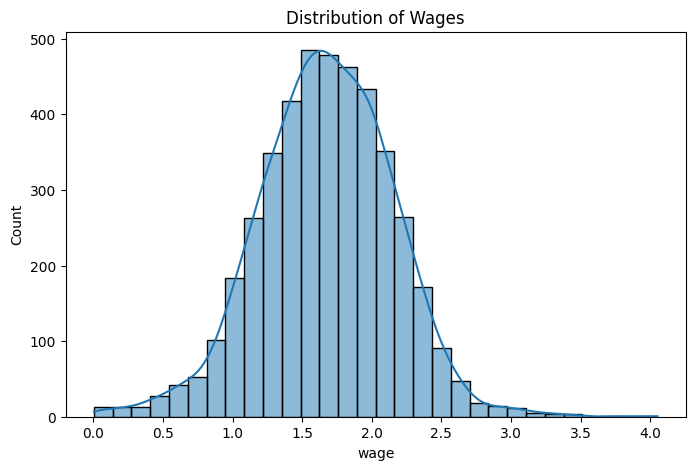

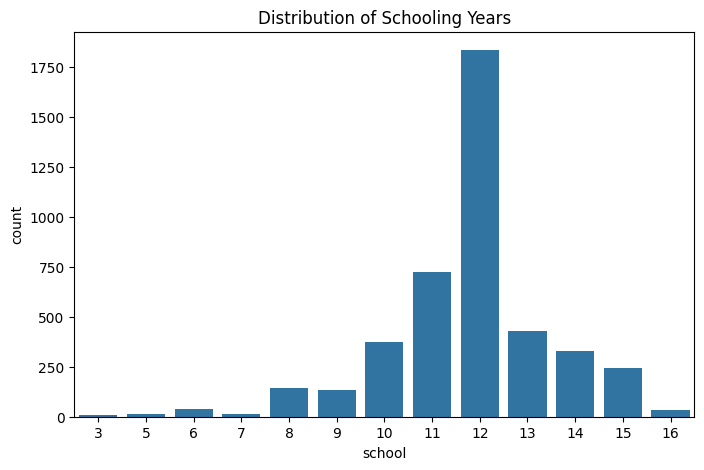

In [ ]:
# Univariate Analysis

# Wage distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['wage'], bins=30, kde=True)
plt.title("Distribution of Wages")
plt.show()

# Schooling distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="school", data=df)
plt.title("Distribution of Schooling Years")
plt.show()

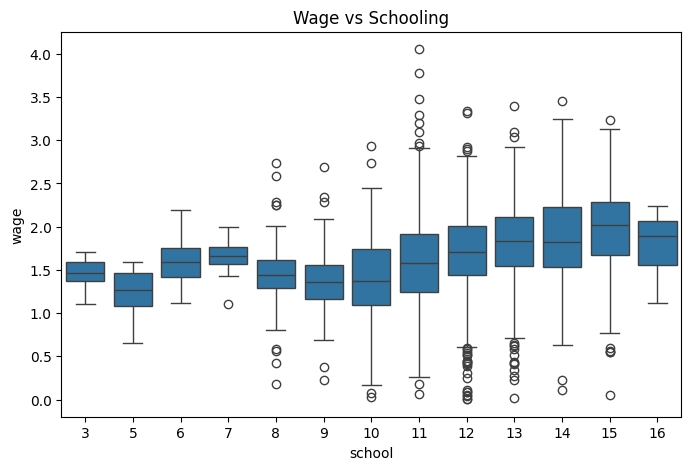

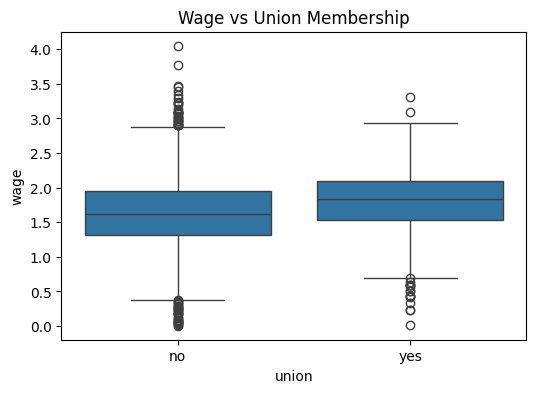

In [ ]:
#Bivariate Analysis

# Wage vs Schooling
plt.figure(figsize=(8, 5))
sns.boxplot(x="school", y="wage", data=df)
plt.title("Wage vs Schooling")
plt.show()

# Wage vs Union
plt.figure(figsize=(6, 4))
sns.boxplot(x="union", y="wage", data=df)
plt.title("Wage vs Union Membership")
plt.show()


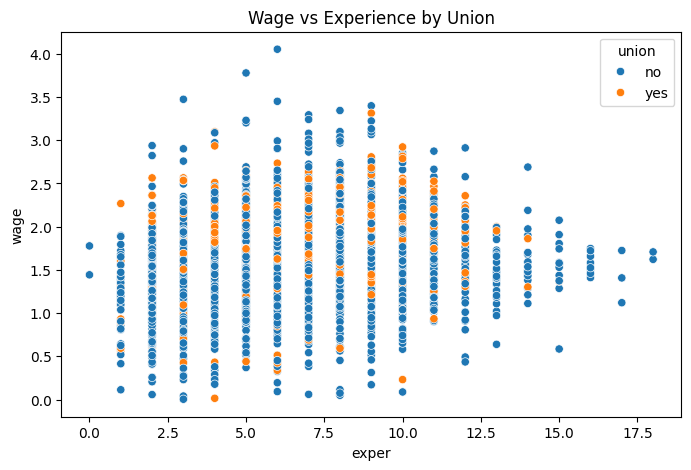

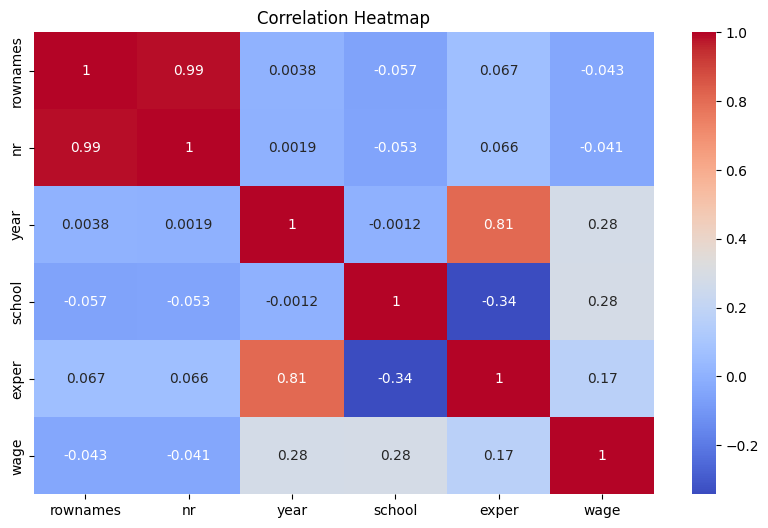

In [ ]:
#Multivariate Analysis

# Wage vs Experience by Union
plt.figure(figsize=(8, 5))
sns.scatterplot(x="exper", y="wage", hue="union", data=df)
plt.title("Wage vs Experience by Union")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
